<a href="https://colab.research.google.com/github/Juscostajr/analise-de-dados-turma-2023/blob/main/Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Este bloco é apenas para exibir os slides, desconsiderem.

In [ ]:
from IPython.display import display, SVG
def show_slide(filename):
  display(SVG(filename='/content/drive/MyDrive/Aulas/Analise de Dados/Aula5SVG/' + filename + '.svg'))

##Importações

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
#Fução besta apenas para mostrar o número em um quadrado bonitinho
def show_box(value):
  sns.set(font_scale=2)
  sns.heatmap([[value]], annot=True)
  sns.set(font_scale=1)

# Regressão Linear

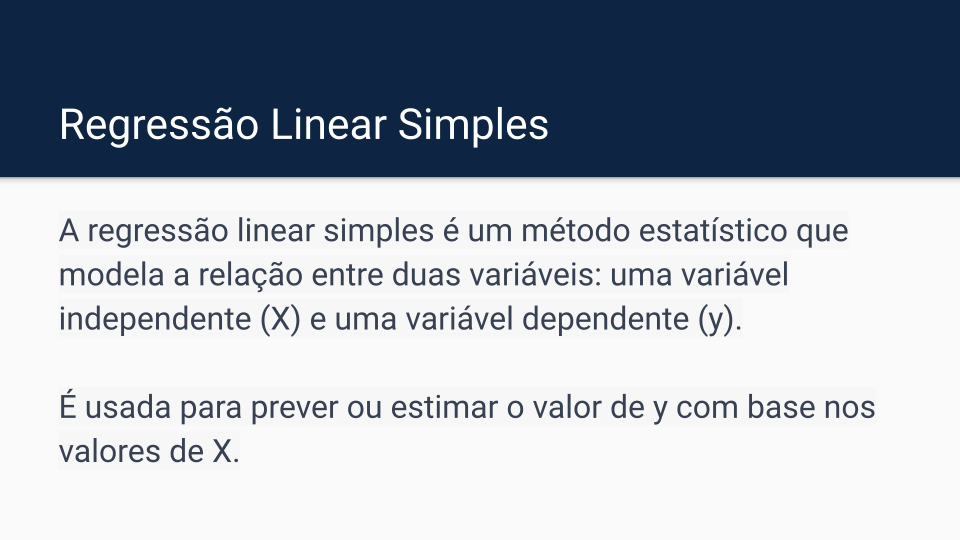

In [ ]:
show_slide('RegressaoLinearSimples')

##Separar Previsores e Classe

In [ ]:
X = np.array([1, 2, 3, 4, 5, 7, 9, 12, 14 ,16]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 6, 9, 15, 16, 18, 20])

##Criar o modelo

In [ ]:
regressor = LinearRegression()

## Treinar o Modelo

In [ ]:
regressor.fit(X, y)

LinearRegression()

## Fazer Previsões

In [ ]:
y_pred = regressor.predict(X)

## Plotar o gráfico

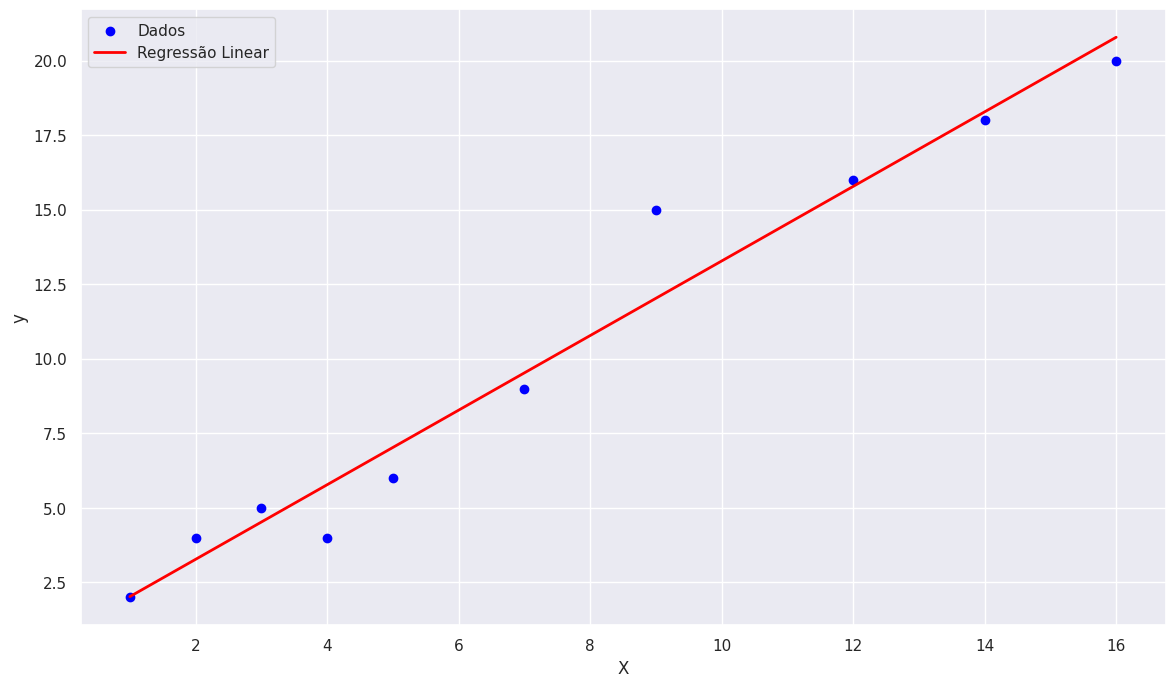

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

##Então podemos fazer novas predições

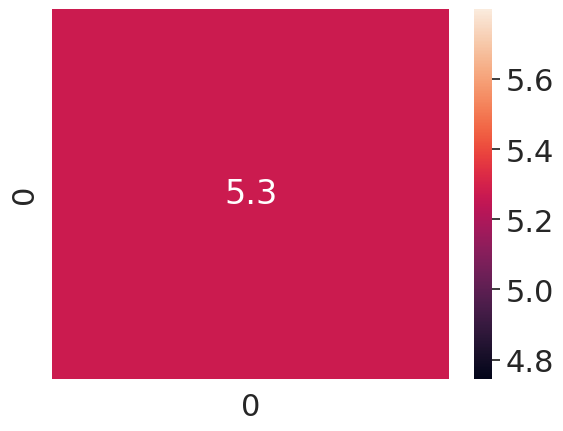

In [ ]:
show_box(regressor.predict([[3.6]])[0])

#Linha de Melhor Ajuste

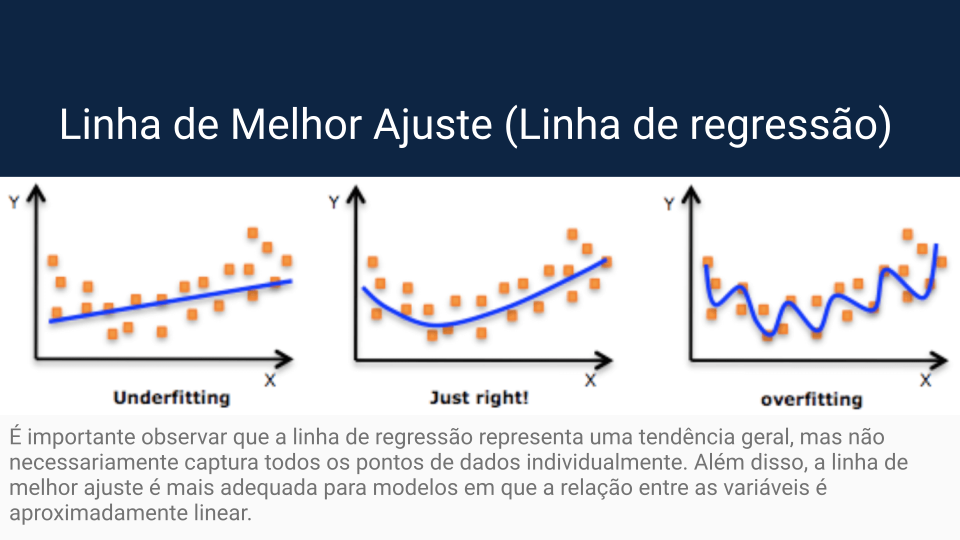

In [ ]:
show_slide('LinhaDeMelhorAjuste')

## Calculamos o coeficiente de determinação
Quanto mais próximo de 1 mais ajustada está a linha de regressão. Coeficiente 0 representa um modelo subajustado(underfit), já um coeficiente 1 representa um modelo superajustado (overfit).

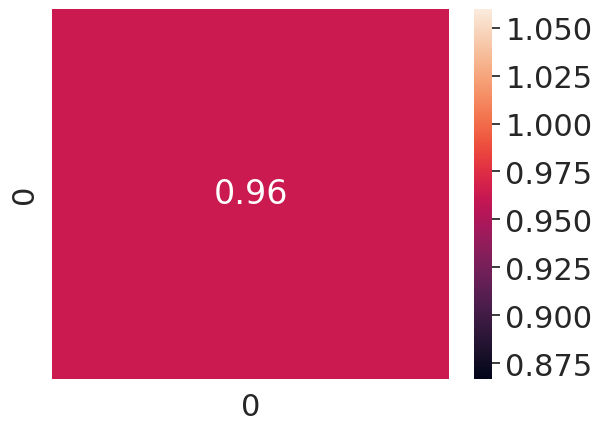

In [ ]:
r2 = r2_score(y, y_pred)
show_box(r2)

##Exemplo do mundo real

#Vamos codar! 🤓

In [ ]:
gorgeta = sns.load_dataset('tips')

In [ ]:
gorgeta.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#g_X = gorgeta['total_bill'].values.reshape(-1,1)
#Variável Independente, Previsor, Atributo
g_X = gorgeta[['total_bill']].values
#Variável Dependente, Classe, Alvo
g_y = gorgeta['tip'].values

In [ ]:
#Separar entre treino e teste
treino_g_X, teste_g_X, treino_g_y, teste_g_y =  train_test_split(
    g_X, g_y, test_size=0.2, random_state=42
)

In [ ]:
#Criar o modelo
modelo_gorgeta = LinearRegression()

In [ ]:
#Treinar o modelo
modelo_gorgeta.fit(treino_g_X,treino_g_y)

LinearRegression()

In [ ]:
gorgeta_predict = modelo_gorgeta.predict(teste_g_X)

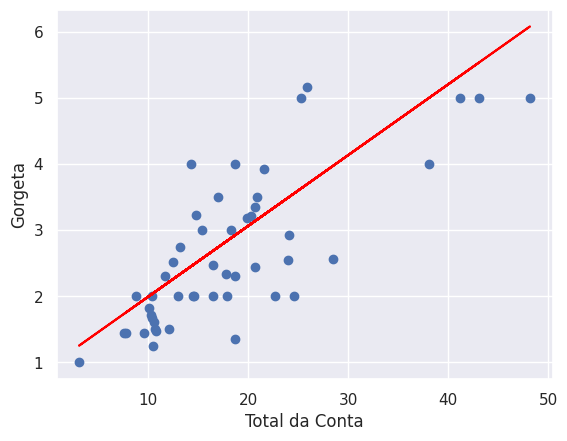

In [ ]:
plt.scatter(teste_g_X,teste_g_y)
plt.xlabel('Total da Conta')
plt.ylabel('Gorgeta')
plt.plot(teste_g_X, gorgeta_predict, color='red')

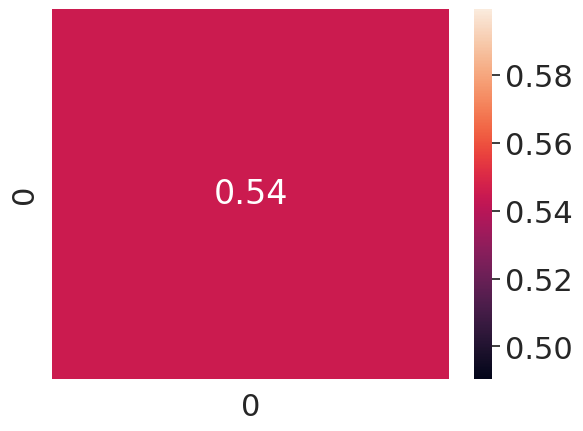

In [ ]:
r2 = r2_score(teste_g_y, gorgeta_predict)
show_box(r2)

# Árvores de Decisão

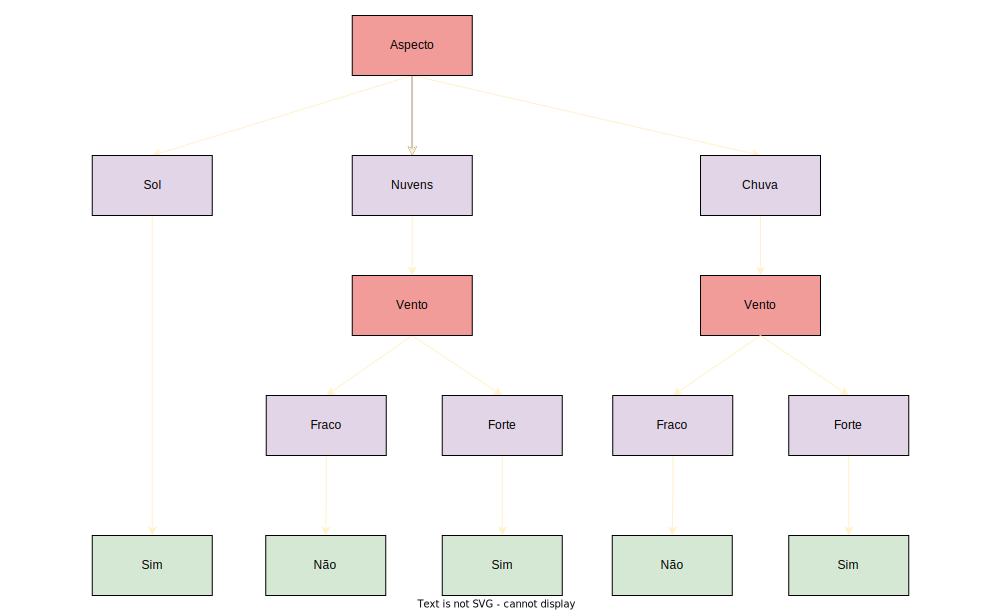

In [ ]:
show_slide('Tree')

## Utilizando a biblioteca Scikit Learn Podemos Fazer Predições utilizando árvores de decisão para isso devemos importar a biblioteca

###Para predizer variáveis numéricas:
```
from sklearn.tree import DecisionTreeRegressor
```
###Para predizer variáveis categóricas:
```
from sklearn.tree import DecisionTreeClassifier
```


In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Aulas/Analise de Dados/Aula5SVG/diabetes.csv')

## Florestas Aleatórias

In [ ]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
    )

In [ ]:
arvore = DecisionTreeClassifier()

In [ ]:
arvore.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = arvore.predict(X_test)

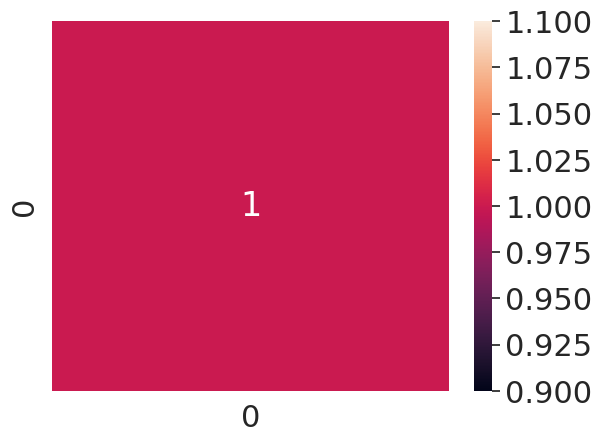

In [ ]:
novo_df = pd.DataFrame(
        [
              {
                'Pregnancies': 4,
                'Glucose':	580,
                'BloodPressure': 76,
                'SkinThickness': 30,
                'Insulin': 80,
                'BMI': 25,
                'DiabetesPedigreeFunction': 0.242,
                'Age'	: 35
            }

        ]
    )


show_box(arvore.predict(novo_df)[0])

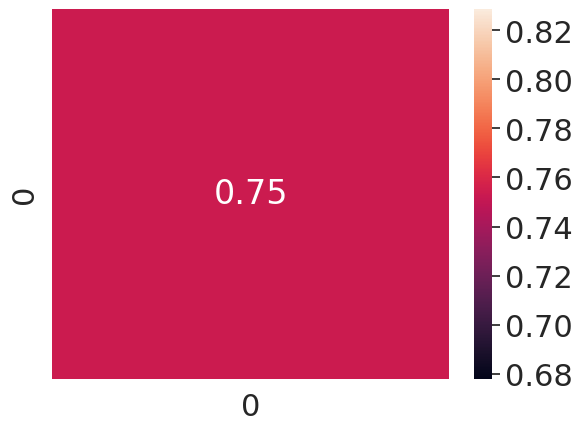

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

show_box(accuracy)

In [ ]:
floresta = RandomForestClassifier()

In [ ]:
floresta.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = floresta.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

0.7337662337662337

#Como melhorar a acurácia do meu modelo?

## Algumas Dicas! ✌
## 1. Faça uma boa análise exploratória, atenção a limpeza dos dados.

In [ ]:
gorgeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 2. As máquinas lidão melhor com números.

In [ ]:
pd.get_dummies(gorgeta)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


## 3. Estabeleça Correlações para Entender seu Conjunto de Dados

In [ ]:
gorgeta_dummies = pd.get_dummies(gorgeta)

<Axes: >

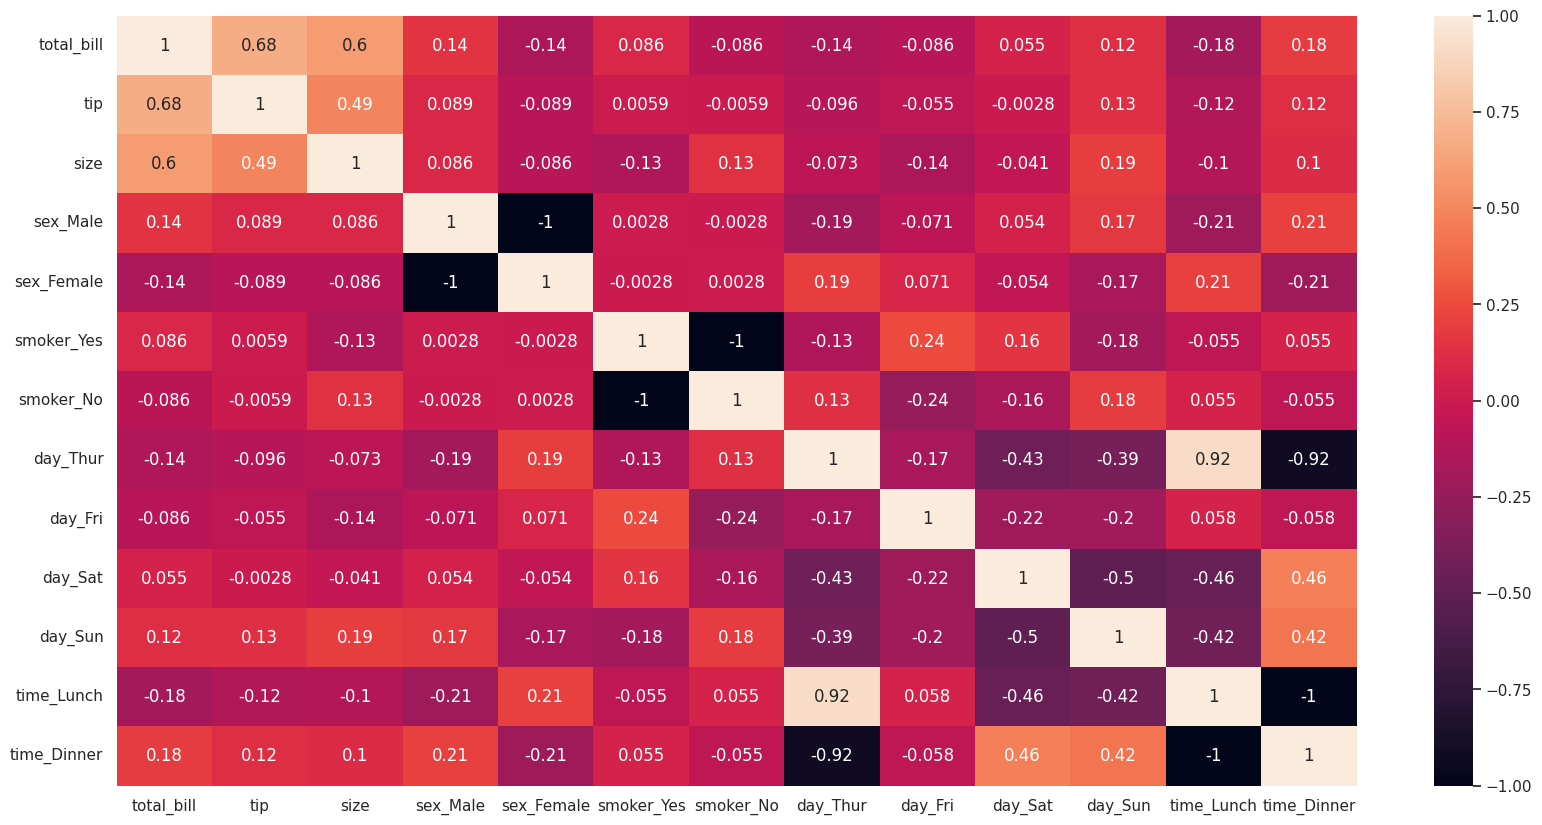

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(gorgeta_dummies.corr(), annot=True)


## Nível Hacker 💻

In [ ]:
# Aplicar pré-processamento nos dados (normalização)
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Vamos recriar o modelo, ajustando hiperparâmetros
model = DecisionTreeClassifier(max_depth=5, min_samples_split=3)

# Treinamos o modelo novamente
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
show_box(accuracy)